Netflix is a subscription-based streaming platform that allows users to watch movies and TV shows without advertisements. One of the reasons behind the popularity of Netflix is its recommendation system. Its recommendation system recommends movies and TV shows based on the user’s interest.

Here’s How Netflix Recommendation System Works

The recommendation system of Netflix shows you movies and TV shows according to your interests. Netflix has a lot of data because of its user base. Its recommendation system predicts a personalised catalogue for you based on factors like:

1.Your viewing history.

2.The viewing history of other users with similar tastes and preferences as yours.

3.Genres, category, description, and more information about the content that you watched in the past.

The genre of the content is one of the most valuable factors that helps Netflix recommend more content even to new users.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data = pd.read_csv("E:\\DS Project\\archive (1)\\netflixData.csv")
data.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [3]:
data.columns

Index(['Show Id', 'Title', 'Description', 'Director', 'Genres', 'Cast',
       'Production Country', 'Release Date', 'Rating', 'Duration',
       'Imdb Score', 'Content Type', 'Date Added'],
      dtype='object')

In [4]:
data.shape

(5967, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Show Id             5967 non-null   object 
 1   Title               5967 non-null   object 
 2   Description         5967 non-null   object 
 3   Director            3903 non-null   object 
 4   Genres              5967 non-null   object 
 5   Cast                5437 non-null   object 
 6   Production Country  5408 non-null   object 
 7   Release Date        5964 non-null   float64
 8   Rating              5963 non-null   object 
 9   Duration            5964 non-null   object 
 10  Imdb Score          5359 non-null   object 
 11  Content Type        5967 non-null   object 
 12  Date Added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


In [6]:
data['Rating'].value_counts()

TV-MA    2541
TV-14    1551
TV-PG     527
R         385
TV-Y      240
PG-13     226
TV-Y7     206
TV-G      146
PG        125
G          15
NC-17       1
Name: Rating, dtype: int64

In [7]:
data['Content Type'].value_counts()

Movie      3867
TV Show    2100
Name: Content Type, dtype: int64

1. The title column contains the titles of movies and TV shows on Netflix.
2. Description column describes the plot of the TV shows and movies.
3. The Content Type column tells us if it’s a movie or a TV show.
4. The Genre column contains all the genres of the TV show or the movie.

In [8]:
#Check null values
data.isnull().sum()

Show Id                  0
Title                    0
Description              0
Director              2064
Genres                   0
Cast                   530
Production Country     559
Release Date             3
Rating                   4
Duration                 3
Imdb Score             608
Content Type             0
Date Added            1335
dtype: int64

<AxesSubplot: >

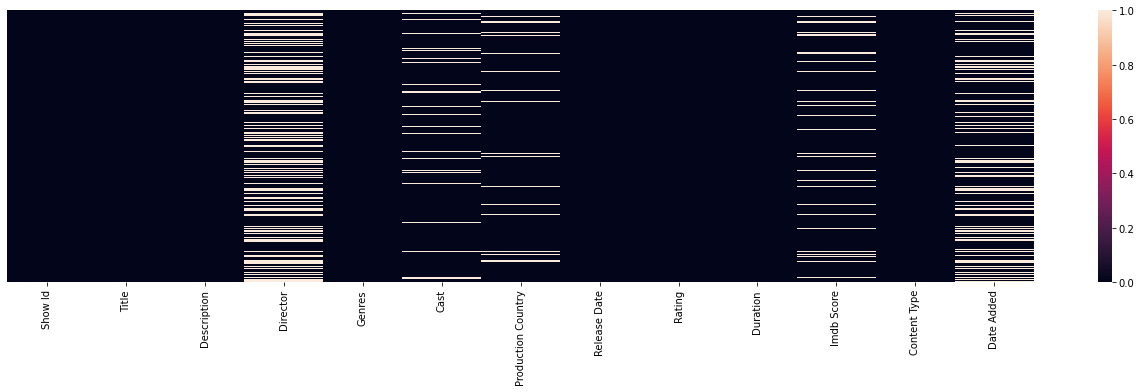

In [9]:
plt.figure(figsize=(23,5))
sns.heatmap(data.isnull(), yticklabels=False, cbar=True)

In [26]:
sample = data.sample(n = 100)

Why does word2vec use cosine similarity?

Cosine similarity says that two vectors point in the same direction, but they could have different magnitudes. For example, cosine similarity makes sense comparing bag-of-words for documents. Two documents might be of different length, but have similar distributions of words.


What is a word cloud used for?

A word cloud (also known as a tag cloud or text cloud) is a visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

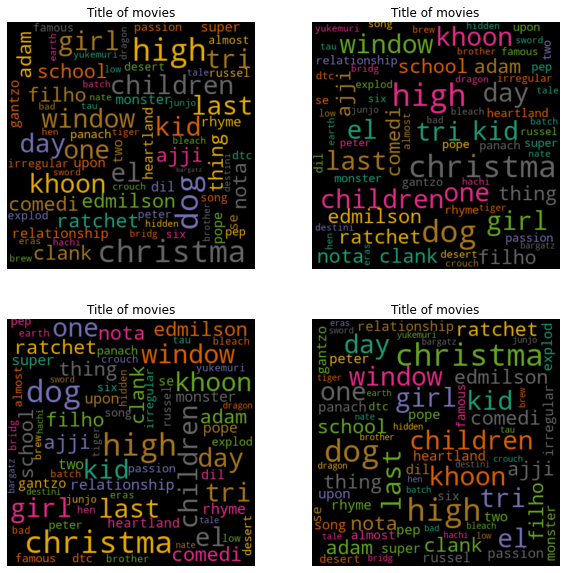

In [28]:
from wordcloud import WordCloud
Titles = (sample['Title']).values
Title = " ".join(i for i in Titles)
fig = plt.figure(figsize=(10,10))
for i in range(4):
    wordcloud = WordCloud(width=400, height=400, max_font_size=50,
                          max_words=70, colormap="Dark2").generate(Title).generate(Title)
    plt.subplot(2, 2, i+1)
    plt.title('Title of movies')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

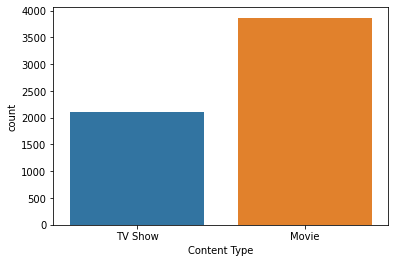

In [10]:
sns.countplot(x="Content Type",data=data)
plt.show()

In [11]:
#Select the columns that we can use to build a Netflix Recommendation System

In [12]:
data = data[['Title','Description','Content Type','Genres']]
data.head()

,Title,Description,Content Type,Genres
0,(Un)Well,This docuseries takes a deep dive into the luc...,TV Show,Reality TV
1,#Alive,"As a grisly virus rampages a city, a lone man ...",Movie,"Horror Movies, International Movies, Thrillers"
2,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...",Movie,"Documentaries, International Movies"
3,#blackAF,Kenya Barris and his family navigate relations...,TV Show,TV Comedies
4,#cats_the_mewvie,This pawesome documentary explores how our fel...,Movie,"Documentaries, International Movies"


In [13]:
#Drop null values
data = data.dropna()

In [14]:
#Clean the title column

In [15]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('http?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

[nltk_data] Downloading package stopwords to C:\Users\Aspire
[nltk_data]     5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
data["Title"] = data["Title"].apply(clean)

In [17]:
data.Title.sample(10)

5313                   witch part   subvers
5213                            speed cuber
4908                                 imposs
1589                               fatezero
5274                          unknown known
4649                                 beguil
2524                           khido khundi
3085    mike birbiglia girlfriend boyfriend
1020                    cinta teruna kimchi
829                                budapest
Name: Title, dtype: object

Now I will use the Genres column as the feature to recommend similar content to the user. I will use the concept of cosine similarity here (used to find similarities in two documents)

In [18]:
feature = data["Genres"].tolist()
tfidf = text.TfidfVectorizer(input=feature, stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

Convert a collection of raw documents to a matrix of TF-IDF features.

What is a TfidfVectorizer?
TFIDF works by proportionally increasing the number of times a word appears in the document but is counterbalanced by the number of documents in which it is present. Hence, words like 'this', 'are' etc., that are commonly present in all the documents are not given a very high rank.

Now I will set the Title column as an index so that we can find similar content by giving the title of the movie or TV show as an input

In [19]:
indices = pd.Series(data.index, 
                    index=data['Title']).drop_duplicates()

In [20]:
def netFlix_recommendation(title, similarity = similarity):
    index = indices[title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[0:10]
    movieindices = [i[0] for i in similarity_scores]
    return data['Title'].iloc[movieindices]



In [25]:
netFlix_recommendation("monster call")

130                     monster call
1490               elizabeth harvest
2282                              io
472                              awe
648          bhavesh joshi superhero
698        black mirror bandersnatch
1100    cosmos laundromat first cycl
3116                           mirag
3555                          orbit 
3613                   pan labyrinth
Name: Title, dtype: object